# Computer Vision

**Application of Image-Augmentation**

Image augmentation generates random images based on existing training data to cope with overfitting. Image augmentation technology expands the scale of training datasets by making a series of random changes to the training images to produce similar, but dif- ferent, training examples. Another way to explain image augmentation is that randomly changing training examples can reduce a modelʼs dependence on certain properties, thereby improving its capability for generalization. For example, we can crop the images in different ways, so that the objects of interest appear in different positions, reducing the modelʼs dependence on the posi- tion where objects appear. We can also adjust the brightness, color, and other factors to reduce modelʼs sensitivity to color.

Source:

https://github.com/zackchase/mxnet-the-straight-dope/tree/master/img

In [1]:
!pip install mxnet
!pip install d2l

In [2]:
!git clone https://github.com/cripton7/Dive-into-Deep-Learning-D2L-Book-.git

Cloning into 'Dive-into-Deep-Learning-D2L-Book-'...
remote: Enumerating objects: 3045, done.
remote: Total 3045 (delta 0), reused 0 (delta 0), pack-reused 3045
Receiving objects: 100% (3045/3045), 130.52 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (1986/1986), done.


In [3]:
!ls Dive-into-Deep-Learning-D2L-Book-/img

404.jpg			  qr_channels.svg
alexnet-all.svg		  qr_conv-layer.svg
anchor-label.svg	  qr_custom-layer.svg
attention.svg		  qr_deep-learning-intro.svg
autumn_oak.jpg		  qr_deep-rnn.svg
aws.png			  qr_deferred-init.svg
beam_search.svg		  qr_densenet.svg
birnn.svg		  qr_dropout.svg
blocks.svg		  qr_environment.svg
book-org.svg		  qr_fashion-mnist.svg
capacity_vs_error.svg	  qr_fasttext.svg
cat1.jpg		  qr_fcn.svg
cat1.png		  qr_fine-tuning.svg
cat2.jpg		  qr_gd-sgd.svg
cat3.jpg		  qr_glove.svg
cat-cartoon1.png	  qr_googlenet.svg
cat-cartoon2.png	  qr_gru.svg
catdog.jpg		  qr_how-to-contribute.svg
cbow.svg		  qr_how-to-use.svg
cifar10.png		  qr_hybridize.svg
comp-comm.svg		  qr_image-augmentation.svg
connect.png		  qr_install.svg
contrib01.png		  qr_introduction.svg
contrib02.png		  qr_jupyter.svg
contrib03.png		  qr_kaggle-gluon-cifar10.svg
contrib04.png		  qr_kaggle-gluon-dog.svg
contrib05.png		  qr_kaggle-house-price.svg
contrib06.png		  qr_lang-model-dataset.svg
conv1d-2d.svg		  qr_lang-m

In [0]:
import os

path = "Dive-into-Deep-Learning-D2L-Book-"

# Now change the directory
os.chdir( path )

# Image Augmentation

Image augmentation technology expands the scale of training datasets by making a series of random changes to the training images to produce similar, but dif- ferent, training examples. By randomly changing training examples can reduce a modelʼs dependence on certain properties, thereby improving its capability for generalization. 

For example, we can crop the images in different ways, so that the objects of interest appear in different positions, reducing the modelʼs dependence on the posi- tion where objects appear. We can also adjust the brightness, color, and other factors to reduce modelʼs sensitivity to color. 

In [0]:
%matplotlib inline
import d2l
from mxnet import autograd, gluon, image, init, np, npx
from mxnet import contrib
from mxnet.gluon import nn

npx.set_np()

## Common Image Augmentation Method

We will use an image with a shape of 400 × 500 as an example.

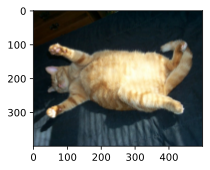

In [0]:
d2l.set_figsize((3.5, 2.5))
img = image.imread('img/cat1.jpg')
d2l.plt.imshow(img.asnumpy());

In [0]:
# auxiliary function apply runs the image augmentation method aug 
# multiple times on the input image img and shows all results.
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

## Flipping and Cropping

Flipping the image left and right. 

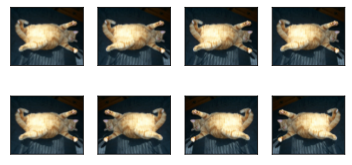

In [0]:
apply(img, gluon.data.vision.transforms.RandomFlipLeftRight())

Next, we create a RandomFlip- TopBottom instance for a 50% chance of flipping the image up and down.

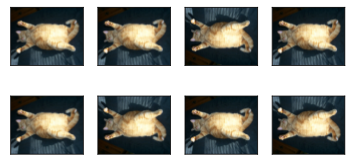

In [0]:
apply(img, gluon.data.vision.transforms.RandomFlipTopBottom())

In the example image we used, the cat is in the middle of the image, but this may not be the case for all images. Pooling layer can reduce the sensitivity of the convolutional layer to the target location. In addition, we can make objects appear at different positions in the image in different proportions by randomly cropping the image. This can also reduce the sensitivity of the model to the target position.

We randomly crop a region with an area of 10% to 100% of the original area, and the ratio of width to height of the region is randomly selected from between 0.5 and 2. Then, the width and height of the region are both scaled to 200 pixels.


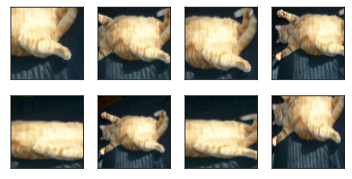

In [0]:
shape_aug = gluon.data.vision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

## Changing the Color

We can change four aspects of the image color: brightness, contrast, saturation, and hue. In the example below, we randomly change the bright- ness of the image to a value between 50% (1 − 0.5) and 150% (1 + 0.5) of the original image.

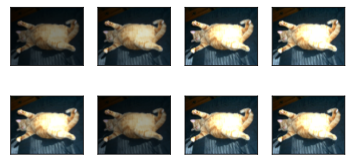

In [0]:
apply(img, gluon.data.vision.transforms.RandomBrightness(0.5))

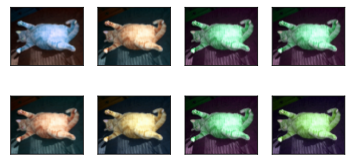

In [0]:
# Similarly, we can randomly change the hue of the image.
apply(img, gluon.data.vision.transforms.RandomHue(0.5))

We can also create a RandomColorJitter instance and set how to randomly change the brightness, contrast, saturation, and hue of the image at the same time.

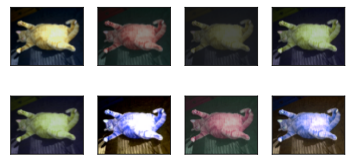

In [0]:
color_aug = gluon.data.vision.transforms.RandomColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## Overlying Multiple Image Augmentation Methods

We can overlay the different image augmentation methods defined above and apply them to each image by using a Compose instance.

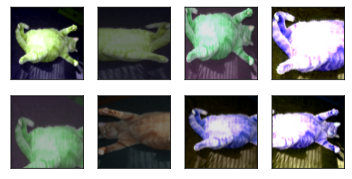

In [0]:
augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.RandomFlipLeftRight(), color_aug, shape_aug])
apply(img, augs)

## Using an Image Augmentation Training Model

Apply image augmentation in actual training. We use the CIFAR-10 dataset. Note: The the position and size of the objects in the Fashion-MNIST dataset have been normalized, and the differences in color and size of the objects in CIFAR-10 dataset are more significant. The first 32 training images in the CIFAR-10 dataset are shown below.

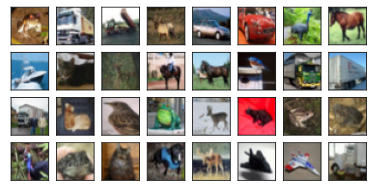

In [0]:
 d2l.show_images(gluon.data.vision.CIFAR10(
    train=True)[0:32][0], 4, 8, scale=0.8);

MXNet format is 32-bit floating point numbers with the shape of (batch size, number of channels, height, width) and value range between 0 and 1.

In [0]:
train_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.RandomFlipLeftRight(),
    gluon.data.vision.transforms.ToTensor()])

test_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.ToTensor()])

we define an auxiliary function to make it easier to read the image and apply image augmen- tation. The transform_first function provided by Gluonʼs dataset applies image augmentation to the first element of each training example (image and label), i.e., the element at the top of the image.

In [0]:
def load_cifar10(is_train, augs, batch_size):
    return gluon.data.DataLoader(
        gluon.data.vision.CIFAR10(train=is_train).transform_first(augs),
        batch_size=batch_size, shuffle=is_train,
        num_workers=d2l.get_dataloader_workers())

## Multi-GPU Training Model

We train the ResNet-18 model and we define the training function to train and evaluate the model using multiple GPUs.

In [0]:
# Saved in the d2l package for later use
def train_batch_ch13(net, features, labels, loss, trainer, ctx_list,
                     split_f=d2l.split_batch):
    Xs, ys = split_f(features, labels, ctx_list)
    with autograd.record():
        pys = [net(X) for X in Xs]
        ls = [loss(py, y) for py, y in zip(pys, ys)]
    for l in ls:
        l.backward()
    trainer.step(labels.shape[0])
    train_loss_sum = sum([float(l.sum()) for l in ls])
    train_acc_sum = sum(d2l.accuracy(py, y) for py, y in zip(pys, ys))
    return train_loss_sum, train_acc_sum

In [0]:
# Saved in the d2l package for later use
def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
               ctx_list=d2l.try_all_gpus(), split_f=d2l.split_batch):
    num_batches, timer = len(train_iter), d2l.Timer()
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        # Store training_loss, training_accuracy, num_examples, num_features
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch13(net, features, labels, loss, trainer, ctx_list, split_f)

            metric.add(l, acc, labels.shape[0], labels.size)
            timer.stop()

            if (i+1) % (num_batches // 5) == 0:
              animator.add(epoch+i/num_batches,(metric[0]/metric[2], metric[1]/metric[3], None))
        test_acc = d2l.evaluate_accuracy_gpus(net, test_iter, split_f)
        animator.add(epoch+1, (None, None, test_acc))

    print('loss %.3f, train acc %.3f, test acc %.3f' % (
        metric[0]/metric[2], metric[1]/metric[3], test_acc))
    print('%.1f examples/sec on %s' % (
        metric[2]*num_epochs/timer.sum(), ctx_list))

In [0]:
batch_size, ctx, net = 256, d2l.try_all_gpus(), d2l.resnet18(10)
net.initialize(init=init.Xavier(), ctx=ctx)

we can define the train_with_data_aug function to use image augmentation to train the model. This function obtains all available GPUs and uses Adam as the optimization algorithm for training. It then applies image augmentation to the training dataset, and finally calls the train function just defined to train and evaluate the model.

In [0]:
def train_with_data_aug(train_augs, test_augs, net, lr=0.001):
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(), 'adam',
                            {'learning_rate': lr})
    train_ch13(net, train_iter, test_iter, loss, trainer, 10, ctx)

Now we train the model using image augmentation of random flipping left and right.

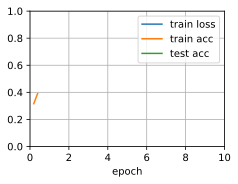

In [0]:
train_with_data_aug(train_augs, test_augs, net)

## Summary
*  Image augmentation generates random images based on existing training data to cope with overfitting.
*  In order to obtain a definitive results during prediction, we usually only apply image augmentation to the training example, and do not use image augmentation with random oper- ations during prediction.

# Fine Tuning

Apply transfer learning to migrate the knowledge learned from the source dataset to the target dataset. For example, although the images in ImageNet are mostly unrelated to chairs, models trained on this dataset can extract more general image features that can help identify edges, textures, shapes, and object composition. These similar features may be equally effective for recognizing a chair.

Common technique in transfer learning fine tuning, consists of the following four steps:
- Pre-train a neural network model, i.e., the source model, on a source dataset (e.g., the Ima-
geNet dataset).
- Create a new neural network model, i.e., the target model. This replicates all model designs and their parameters on the source model, except the output layer. We assume that these model parameters contain the knowledge learned from the source dataset and this knowl- edge will be equally applicable to the target dataset. We also assume that the output layer of the source model is closely related to the labels of the source dataset and is therefore not used in the target model.
- Add an output layer whose output size is the number of target dataset categories to the target model, and randomly initialize the model parameters of this layer.
- Train the target model on a target dataset, such as a chair dataset. We will train the output layer from scratch, while the parameters of all remaining layers are fine tuned based on the parameters of the source model.

# Hot Dog Recognition

We will fine tune the ResNet model trained on the ImageNet dataset based on a small dataset. This small dataset contains thou- sands of images, some of which contain hot dogs. We will use the model obtained by fine tuning to identify whether an image contains a hot dog.

**Obtaining the Dataset**

The hot dog dataset we use was taken from online images and contains 1, 400 positive images containing hot dogs and same number of negative images containing other foods. 1, 000 images of various classes are used for training and the rest are used for testing.

We first download the compressed dataset and get two folders `hotdog/train` and `hotdog/test`. Both folders have hotdog and not-hotdog category subfolders, each of which has corresponding image files.

In [0]:
# Saved in the d2l package for later use
d2l.DATA_HUB['hotdog'] = (d2l.DATA_URL+'hotdog.zip',
                         'fba480ffa8aa7e0febbb511d181409f899b9baa5')
data_dir = d2l.download_extract('hotdog')

We create two `ImageFolderDataset` instances to read all the image files in the training dataset and testing dataset, respectively.

In [0]:
train_imgs = gluon.data.vision.ImageFolderDataset(data_dir + 'train')
test_imgs  = gluon.data.vision.ImageFolderDataset(data_dir + 'test')

The first 8 positive examples and the last 8 negative images are shown below. As we can see, the images vary in size and aspect ratio.

In [0]:
hotdogs = [train_imgs[i][0] for i in range(8)]
not_hotdogs = [train_imgs[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=1.4);

During training, we first crop a random area with random size and random aspect ratio from the image and then scale the area to an input with a height and width of 224 pixels. During testing, we scale the height and width of images to 256 pixels, and then crop the center area with height and width of 224 pixels to use as the input. In addition, we normalize the values of the three RGB (red, green, and blue) color channels. The average of all values of the channel is subtracted from each value and then the result is divided by the standard deviation of all values of the channel to produce the output.

In [0]:
# We specify the mean and variance of the three RGB channels to normalize the
# image channel
normalize = gluon.data.vision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.RandomResizedCrop(224),
    gluon.data.vision.transforms.RandomFlipLeftRight(),
    gluon.data.vision.transforms.ToTensor(),
normalize])

test_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.Resize(256),
    gluon.data.vision.transforms.CenterCrop(224),
    gluon.data.vision.transforms.ToTensor(),
    normalize])

**Defining and Initializing the Model**

We use ResNet-18, which was pre-trained on the ImageNet dataset, as the source model. Here, we specify pretrained=True to automatically download and load the pre-trained model parameters. The first time they are used, the model parameters need to be downloaded from the Internet.

In [0]:
pretrained_net = gluon.model_zoo.vision.resnet18_v2(pretrained=True)

The pre-trained source model instance contains two member variables: `features` and `output`. The former contains all layers of the model, except the output layer, and the latter is the output layer of the model. The main purpose of this division is to facilitate the fine tuning of the model parameters of all layers except the output layer. The member variable output of source model is given below. As a fully connected layer, it transforms ***ResNetʼs final global average pooling layer output*** into 1000 class output on the ImageNet dataset.

In [0]:
pretrained_net.output

In [0]:
finetune_net = gluon.model_zoo.vision.resnet18_v2(classes=2)
finetune_net.features = pretrained_net.features
finetune_net.output.initialize(init.Xavier())

Assume the learning rate in the Trainer instance is η and use a learning rate of 10η to update the model parameters in the member variable output.

In [0]:
# The model parameters in output will be updated using a learning rate ten
# times greater
finetune_net.output.collect_params().setattr('lr_mult', 10)

**Fine Tuning the Model**

We first define a training function `train_fine_tuning` that uses fine tuning so it can be called multiple times.

In [0]:
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5):
    train_iter = gluon.data.DataLoader(
        train_imgs.transform_first(train_augs), batch_size, shuffle=True)
    test_iter = gluon.data.DataLoader(
        test_imgs.transform_first(test_augs), batch_size)
    ctx = d2l.try_all_gpus()
    net.collect_params().reset_ctx(ctx)
    net.hybridize()
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate, 'wd': 0.001})
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, ctx)

We set the learning rate in the Trainer instance to a smaller value, such as 0.01, in order to fine tune the model parameters obtained in pre-training. Based on the previous settings, we will train the output layer parameters of the target model from scratch using a learning rate ten times greater.

In [0]:
train_fine_tuning(finetune_net, 0.01)

For comparison, we define an identical model, but initialize all of its model parameters to random values. Since the entire model needs to be trained from scratch, we can use a larger learning rate.

In [0]:
scratch_net = gluon.model_zoo.vision.resnet18_v2(classes=2)
scratch_net.initialize(init=init.Xavier())
train_fine_tuning(scratch_net, 0.1)

Set the parameters in fine tune_net.features to the parameters of the source model and do not update them during training. What will happen? 

In [0]:
finetune_net.features.collect_params().setattr('grad_req', 'null')

In [0]:
weight = pretrained_net.output.weight
hotdog_w = np.split(weight.data(), 1000, axis=0)[713]
hotdog_w.shape

# Object Detection and Bounding Boxes

we will load a sample images, We can see there is a dog on the left side of the image and a cat on the right. They are the two main targets in this image.

In [0]:
d2l.set_figsize((3.5, 2.5))
img = image.imread('img/catdog.jpg').asnumpy()
d2l.plt.imshow(img);

## Bounding Box

In object detection, we usually use a bounding box to describe the target location. The bounding box is a rectangular box that can be determined by the x and y axis coordinates in the upper-left corner and the x and y axis coordinates in the lower-right corner of the rectangle. 

We will define the bounding boxes of the dog and the cat in the image based on the coordinate information in the image. 

In [0]:
# bbox is the abbreviation for bounding box
dog_bbox, cat_bbox = [60, 45, 378, 516], [400, 112, 655, 493]   

We can draw the bounding box in the image to check if it is accurate. 

In [0]:
# Saved in the d2l package for later use
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

After loading the bounding box on the image, we can see that the main outline of the target is basically inside the box.

In [0]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

## Anchor Boxes

Object detection algorithms usually sample a large number of regions in the input image, deter- mine whether these regions contain objects of interest, and adjust the edges of the regions so as to predict the ground-truth bounding box of the target more accurately. Different models may use different region sampling methods. These anchor boxes are used to sample different regions of the input image. 

***One such method:*** it generates mul- tiple bounding boxes with different sizes and aspect ratios while centering on each pixel. These bounding boxes are called anchor boxes. For example *object detection based on anchor boxes*.

In [0]:
np.set_printoptions(2)
npx.set_np()

## Generating Multiple Anchor Boxes

In [0]:
img = image.imread('img/catdog.jpg').asnumpy()
h, w = img.shape[0:2]
print(h, w)

561 728


In [0]:
X = np.random.uniform(size=(1, 3, h, w))  # Construct input data
Y = npx.multibox_prior(X, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
Y.shape

(1, 2042040, 4)

We can see that the shape of the returned anchor box variable y is (batch size, number of an- chor boxes, 4). After changing the shape of the anchor box variable y to (image height, image width, number of anchor boxes centered on the same pixel, 4), we can obtain all the anchor boxes centered on a specified pixel position. In the following example, we access the first anchor box centered on (250, 250). It has four elements: the x, y axis coordinates in the upper-left corner and the x, y axis coordinates in the lower-right corner of the anchor box. The coordinate values of the x and y axis are divided by the width and height of the image, respectively, so the value range is between 0 and 1.

In [0]:
boxes = Y.reshape(h, w, 5, 4)
boxes[250, 250, 0, :]

array([0.06, 0.07, 0.63, 0.82])

In order to describe all anchor boxes centered on one pixel in the image, we first define the show_bboxes function to draw multiple bounding boxes on the image.

In [0]:
# Saved in the d2l package for later use
def show_bboxes(axes, bboxes, labels=None, colors=None):
    """Show bounding boxes."""
    def _make_list(obj, default_values=None):
        if obj is None:
            obj = default_values
        elif not isinstance(obj, (list, tuple)):
            obj = [obj]
        return obj
    labels = _make_list(labels)
    colors = _make_list(colors, ['b', 'g', 'r', 'm', 'c'])
    for i, bbox in enumerate(bboxes):
        color = colors[i % len(colors)]
        rect = d2l.bbox_to_rect(bbox.asnumpy(), color)
        axes.add_patch(rect)
        if labels and len(labels) > i:
            text_color = 'k' if color == 'w' else 'w'
            axes.text(rect.xy[0], rect.xy[1], labels[i],
                      va='center', ha='center', fontsize=9, color=text_color,
                      bbox=dict(facecolor=color, lw=0))

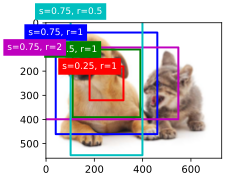

In [0]:
d2l.set_figsize((3.5, 2.5))
bbox_scale = np.array((w, h, w, h))
fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, boxes[250, 250, :, :] * bbox_scale,
            ['s=0.75, r=1', 's=0.5, r=1', 's=0.25, r=1', 's=0.75, r=2',
             's=0.75, r=0.5'])

## Intersection over Union

An intuitive method is to measure the similarity between anchor boxes and the ground-truth bounding box. We know that the Jaccard index can measure the similarity between two sets. 

Given sets A and B, their Jaccard index is the size of their intersection divided by the size of their union:

$J(A,B)= \frac{|A ∩ B|}{|A ∪ B|}$

We can measure the similarity of the two bounding boxes by the Jaccard index of their pixel sets. When we measure the similarity of two bounding boxes, we usually refer the Jaccard index as intersection over union (IoU), which is the ratio of the intersecting area to the union area of the two bounding boxes. The value range of IoU is between 0 and 1: 0 means that there are no overlapping pixels between the two bounding boxes, while 1 indicates that the two bounding boxes are equal.

 we will use IoU to measure the similarity between anchor boxes and ground-truth bounding boxes, and between different anchor boxes.


## Labeling Training Set Anchor Boxes

In object detection, we first generate multiple anchor boxes, predict the categories and offsets for each anchor box, adjust the anchor box position according to the predicted offset to obtain the bounding boxes to be used for prediction, and finally filter out the prediction bounding boxes that need to be output.

 After the anchor boxes are generated, we primarily label anchor boxes based on the location and category information of the ground-truth bounding boxes similar to the anchor boxes.

In [0]:
ground_truth = np.array([[0, 0.1, 0.08, 0.52, 0.92],
                         [1, 0.55, 0.2, 0.9, 0.88]])
anchors = np.array([[0, 0.1, 0.2, 0.3], [0.15, 0.2, 0.4, 0.4],
                    [0.63, 0.05, 0.88, 0.98], [0.66, 0.45, 0.8, 0.8],
                    [0.57, 0.3, 0.92, 0.9]])

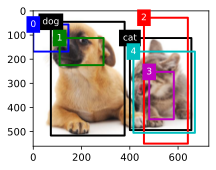

In [0]:
fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, ground_truth[:, 1:] * bbox_scale, ['dog', 'cat'], 'k')
show_bboxes(fig.axes, anchors * bbox_scale, ['0', '1', '2', '3', '4']);

We add example dimensions to the anchor boxes and ground-truth bounding boxes and construct random predicted results with a shape of (batch size, number of categories including background, number of anchor boxes) by using the expand_dims function.

In [0]:
labels = npx.multibox_target(np.expand_dims(anchors, axis=0),
                             np.expand_dims(ground_truth, axis=0),
                             np.zeros((1, 3, 5)))

This item below representes the category labeled for the anchor box.

In [0]:
labels[2]

array([[0., 1., 2., 0., 2.]])

We analyze these labelled categories based on positions of anchor boxes and ground-truth bound- ing boxes in the image.

The second item of the return value is a mask variable, with the shape of (batch size, four times the number of anchor boxes). The elements in the mask variable correspond one-to-one with the four offset values of each anchor box. Because we do not care about background detection, offsets of the negative class should not affect the target function.

In [0]:
labels[1]

array([[0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1.]])

The first item returned is the four offset values labeled for each anchor box, with the offsets of negative class anchor boxes labeled as 0.

In [0]:
labels[0]

array([[ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  1.40e+00,  1.00e+01,
         2.59e+00,  7.18e+00, -1.20e+00,  2.69e-01,  1.68e+00, -1.57e+00,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -5.71e-01, -1.00e+00,
        -8.94e-07,  6.26e-01]])

## Bounding Boxes for Prediction

During model prediction phase, we first generate multiple anchor boxes for the image and then predict categories and offsets for these anchor boxes one by one. Then, we obtain prediction bounding boxes based on anchor boxes and their predicted offsets. When there are many anchor boxes, many similar prediction bounding boxes may be output for the same target. To simplify the results, we can remove similar prediction bounding boxes. A commonly used method is called non-maximum suppression (NMS).

In [0]:
anchors = np.array([[0.1, 0.08, 0.52, 0.92], [0.08, 0.2, 0.56, 0.95],
                    [0.15, 0.3, 0.62, 0.91], [0.55, 0.2, 0.9, 0.88]])
offset_preds = np.array([0] * anchors.size)
cls_probs = np.array([[0] * 4,  # Predicted probability for background
                      [0.9, 0.8, 0.7, 0.1],  # Predicted probability for dog
                      [0.1, 0.2, 0.3, 0.9]])  # Predicted probability for cat

Print prediction bounding boxes and their confidence levels on the image.

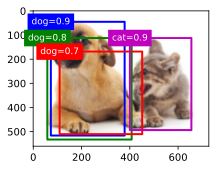

In [0]:
fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, anchors * bbox_scale,
            ['dog=0.9', 'dog=0.8', 'dog=0.7', 'cat=0.9'])

We use the MultiBoxDetection function of the contrib.nd module to perform NMS and set the threshold to 0.5. This adds an example dimension to the ndarray input. 

In [0]:
output = npx.multibox_detection(
    np.expand_dims(cls_probs, axis=0),
    np.expand_dims(offset_preds, axis=0),
    np.expand_dims(anchors, axis=0),
    nms_threshold=0.5)
output

array([[[ 0.  ,  0.9 ,  0.1 ,  0.08,  0.52,  0.92],
        [ 1.  ,  0.9 ,  0.55,  0.2 ,  0.9 ,  0.88],
        [-1.  ,  0.8 ,  0.08,  0.2 ,  0.56,  0.95],
        [-1.  ,  0.7 ,  0.15,  0.3 ,  0.62,  0.91]]])

We remove the prediction bounding boxes of category -1 and visualize the results retained by NMS.

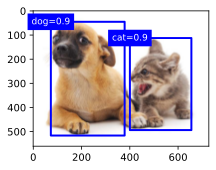

In [0]:
fig = d2l.plt.imshow(img)
for i in output[0].asnumpy():
    if i[0] == -1:
        continue
    label = ('dog=', 'cat=')[int(i[0])] + str(i[1])
    show_bboxes(fig.axes, [np.array(i[2:]) * bbox_scale], label)

In practice, we can remove prediction bounding boxes with lower confidence levels before per- forming NMS, thereby reducing the amount of computation for NMS. We can also filter the output of NMS, for example, by only retaining results with higher confidence levels as the final output.

## Summary
* We generate multiple anchor boxes with different sizes and aspect ratios, centered on each pixel.
* IoU, also called Jaccard index, measures the similarity of two bounding boxes. It is the ratio of the intersecting area to the union area of two bounding boxes.
* In the trainin gset,we mark two types of labels for each anchor box: one is the category of the target contained in the anchor box and the other is the offset of the ground-truth bounding box relative to the anchor box.
* When predicting, we can use non-maximum suppression (NMS) to remove similar prediction bounding boxes, thereby simplifying the results.

# Multi-scale Object Detection

To demonstrate how to generate anchor boxes on multiple scales, letʼs read an image first. It has a height and width of 561 × 728 pixels.

In [0]:
img = image.imread('img/catdog.jpg')
h, w = img.shape[0:2]
h, w

(561, 728)

We are going to generate anchor boxes anchors centered on each unit (pixel) on the feature map fmap. Since the coordinates of axes x and y in anchor boxes anchors have been divided by the width and height of the feature map fmap, values between 0 and 1 can be used to represent relative positions of anchor boxes in the feature map. Since the midpoints of anchor boxes anchors overlap with all the units on feature map fmap, the relative spatial positions of the midpoints of the anchors on any image must have a uniform dis- tribution. Specifically, when the width and height of the feature map are set to fmap_w and fmap_h respectively, the function will conduct uniform sampling for fmap_h rows and fmap_w columns of pixels and use them as midpoints to generate anchor boxes with size s (we assume that the length of list s is 1) and different aspect ratios (ratios).


In [0]:
def display_anchors(fmap_w, fmap_h, s):
    d2l.set_figsize((3.5, 2.5))
    # The values from the first two dimensions will not affect the output
    fmap = np.zeros((1, 10, fmap_w, fmap_h))
    anchors = npx.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])
    bbox_scale = np.array((w, h, w, h))
    d2l.show_bboxes(d2l.plt.imshow(img.asnumpy()).axes,
                    anchors[0] * bbox_scale)

We will first focus on the detection of small objects. In order to make it easier to distinguish upon display, the anchor boxes with different midpoints here do not overlap. We assume that the size of the anchor boxes is 0.15 and the height and width of the feature map are 4. We can see that the midpoints of anchor boxes from the 4 rows and 4 columns on the image are uniformly distributed.

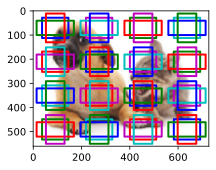

In [0]:
display_anchors(fmap_w=4, fmap_h=4, s=[0.15])

We are going to reduce the height and width of the feature map by half and use a larger anchor box to detect larger objects. When the size is set to 0.4, overlaps will occur between regions of some anchor boxes.

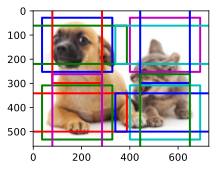

In [0]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])

Finally, we are going to reduce the height and width of the feature map by half and increase the anchor box size to 0.8. Now the midpoint of the anchor box is the center of the image.

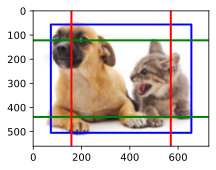

In [0]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])

When the feature maps of different layers have receptive fields of different sizes on the input im- age, they are used to detect objects of different sizes. For example, we can design a network to have a wider receptive field for each unit in the feature map that is closer to the output layer, to detect objects with larger sizes in the input image.

## Summary
* We can generate anchor boxes with different numbers and sizes on multiple-scales to detect objects of different sizes on multiple scales.
* The shape of the feature map can be used to determine the midpoint of the anchor boxes that uniformly sample any image.
* We use the information for the input image from a certain receptive field to predict the cat- egory and offset of the anchor boxes close to that field on the image.

# Pikachu - Object Detection

First, we generate 1000 Pikachu images of different angles and sizes using an open source 3D Pikachu model. Then, we collect a series of background images and place a Pikachu image at a random position on each image.

We use the im2rec tool provided by MXNet to convert the images to binary RecordIO format. This format can reduce the storage overhead of the dataset on the disk and improve the reading efficiency.

**Download the Pikachu dataset in RecordIO format**

In [0]:
# Saved in the d2l package for later use
 d2l.DATA_HUB['pikachu'] = (d2l.DATA_URL + 'pikachu.zip',
                           '68ab1bd42143c5966785eb0d7b2839df8d570190')

## Reading the Dataset

We are going to read the object detection dataset by creating the instance ImageDetIter. The “Det” in the name refers to Detection. We will read the training dataset in random order. Since the for- mat of the dataset is RecordIO, we need the image index file 'train.idx' to read random mini- batches. In addition, for each image of the training set, we will use random cropping and require the cropped image to cover at least 95% of each object. Since the cropping is random, this re- quirement is not always satisfied. We preset the maximum number of random cropping attempts to 200. If none of them meets the requirement, the image will not be cropped. To ensure the cer- tainty of the output, we will not randomly crop the images in the test dataset. We also do not need to read the test dataset in random order.

In [0]:
# Saved in the d2l package for later use
def load_data_pikachu(batch_size, edge_size=256):
    """Load the pikachu dataset."""
    data_dir = d2l.download_extract('pikachu')
    train_iter = image.ImageDetIter(
        path_imgrec=data_dir + 'train.rec',
        path_imgidx=data_dir + 'train.idx',
        batch_size=batch_size,
        data_shape=(3, edge_size, edge_size),  # The shape of the output image
        shuffle=True,  # Read the dataset in random order
        rand_crop=1,  # The probability of random cropping is 1
        min_object_covered=0.95, max_attempts=200)
    val_iter = image.ImageDetIter(
        path_imgrec=data_dir + 'val.rec', batch_size=batch_size,
        data_shape=(3, edge_size, edge_size), shuffle=False)
    return train_iter, val_iter

In [0]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_pikachu(batch_size, edge_size)

The shape of the image - (batch size, number of channels, height, width). The shape of the label is (batch size, m, 5), where m is equal to the maximum number of bounding boxes contained in a single image in the dataset. he Pikachu dataset here has only one bounding box per image, so m = 1.

In [0]:
batch = train_iter.next()
batch.data[0].shape, batch.label[0].shape

((32, 3, 256, 256), (32, 1, 5))

## Demostration synthesized images

The Pikachu dataset we synthesized can be used to test object detection models.

We have ten images with bounding boxes on them. We can see that the angle, size, and position of Pikachu are different in each image. 

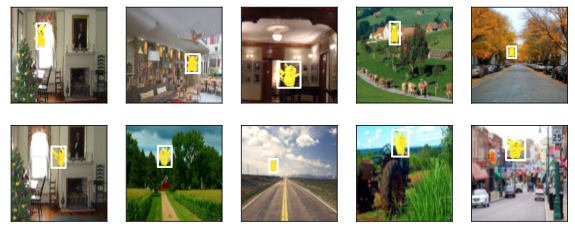

In [0]:
imgs = (batch.data[0][0:10].transpose(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch.label[0][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

# Single Shot Multibox Detection (SSD)

Single shot multibox detection (SSD) is a multiscale object detection model. The SSD is composed of a base network block and several multiscale feature blocks connected in a series.

Here, the base network block is used to extract features of original images, and it generally takes the form of a deep convolutional neural network. Originally, SSDs choose to place a truncated VGG before the classification layer, but this is now commonly replaced by ResNet. We can design the base network so that it outputs larger heights and widths. In this way, more anchor boxes are generated based on this feature map, allowing us to detect smaller objects. Next, each multiscale feature block reduces the height and width of the feature map provided by the previous layer (for example, it may reduce the sizes by half). The blocks then use each element in the feature map to expand the receptive field on the input image. In this way, the closer a multiscale feature block the smaller its output feature map, and the fewer the anchor boxes that are generated based on the feature map. In addition, the closer a feature block is to the top, the larger the receptive field of each element in the feature map and the better suited it is to detect larger objects. As the SSD generates different numbers of anchor boxes of different sizes based on the base network block and each multiscale feature block and then predicts the categories and offsets (i.e., predicted bounding boxes) of the anchor boxes in order to detect objects of different sizes, SSD is a multiscale object detection model.

Basically, this model generates different numbers of anchor boxes of different sizes based on the base network block and each multiscale feature block and predicts the categories and offsets of the anchor boxes to detect objects of different sizes. During SSD model training, the loss function is calculated using the predicted and labeled category and offset values.


We will construct an object detection model: single shot multibox detection.

## Category Prediction Layer

the category prediction layer uses a convolutional layer that maintains the input height and width. Thus, the output and input have a one-to-one correspondence to the spatial coordinates along the width and height of the feature map. Assuming that the output and input have the same spatial coordinates (x, y), the channel for the coordinates (x, y) on the output fea- ture map contains the category predictions for all anchor boxes generated using the input feature map coordinates (x, y) as the center.

Therefore, there are a(q + 1) output channels, with the out- put channels indexed as i(q + 1) + j (0 ≤ j ≤ q) representing the predictions of the category index j for the anchor box index i.

In [0]:
def cls_predictor(num_anchors, num_classes):
    return nn.Conv2D(num_anchors * (num_classes + 1), kernel_size=3,
                     padding=1)

## Bounding Box Prediction Layer

The design of the bounding box prediction layer is similar to that of the category prediction layer. The only difference is that, here, we need to predict 4 offsets for each anchor box, rather than q + 1 categories.

In [0]:
def bbox_predictor(num_anchors):
    return nn.Conv2D(num_anchors * 4, kernel_size=3, padding=1)

## Concatenating Predictions for Multiple Scales

SSD uses feature maps based on multiple scales to generate anchor boxes and predict their categories and offsets. Because the shapes and number of anchor boxes centered on the same element differ for the feature maps of different scales, the prediction outputs at different scales may have different shapes.

In [0]:
def forward(x, block):
    block.initialize()
    return block(x)

In the following example, we use the same batch of data to construct feature maps of two different scales, Y1 and Y2. Here, Y2 has half the height and half the width of Y1. Using category prediction as an example, we assume that each element in the Y1 and Y2 feature maps generates five (Y1) or three (Y2) anchor boxes. When there are 10 object categories, the number of category prediction output channels is either 5 × (10 + 1) = 55 or 3 × (10 + 1) = 33. The format of the prediction output is (batch size, number of channels, height, width).

As we can see, except for the batch size, the sizes of the other dimensions are different. Therefore, we must transform them into a consistent format and concatenate the predictions of the multiple scales to facilitate subsequent computation.

In [0]:
Y1 = forward(np.zeros((2, 8, 20, 20)), cls_predictor(5, 10))
Y2 = forward(np.zeros((2, 16, 10, 10)), cls_predictor(3, 10))
print(Y1.shape, Y2.shape)

(2, 55, 20, 20) (2, 33, 10, 10)


The channel dimension contains the predictions for all anchor boxes with the same center. We first move the channel dimension to the final dimension. Because the batch size is the same for all scales, we can convert the prediction results to binary format (batch size, height × width × number of channels) to facilitate subsequent concatenation on the 1st dimension.

In [0]:
def flatten_pred(pred):
    return npx.batch_flatten(pred.transpose(0, 2, 3, 1))
    
def concat_preds(preds):
    return np.concatenate([flatten_pred(p) for p in preds], axis=1)

Regardless of the different shapes of Y1 and Y2, we can still concatenate the prediction results for the two different scales of the same batch.


In [0]:
concat_preds([Y1, Y2]).shape

(2, 25300)

## Height and Width Downsample Block

For multiscale object detection, we define the following down_sample_blk block, which reduces the height and width by 50%. This block consists of two 3 × 3 convolutional layers with a padding of 1 and a 2 × 2 maximum pooling layer with a stride of 2 connected in a series. As we know, 3 × 3 convolutional layers with a padding of 1 do not change the shape of feature maps. However, the subsequent pooling layer directly reduces the size of the feature map by half. 

In [0]:
def down_sample_blk(num_channels):
    blk = nn.Sequential()
    for _ in range(2):
        blk.add(nn.Conv2D(num_channels, kernel_size=3, padding=1),
                nn.BatchNorm(in_channels=num_channels),
                nn.Activation('relu'))
    blk.add(nn.MaxPool2D(2))
    return blk

By testing forward computation in the height and width downsample block, we can see that it changes the number of input channels and halves the height and width.

In [0]:
forward(np.zeros((2, 3, 20, 20)), down_sample_blk(10)).shape

(2, 10, 10, 10)

## Base Network Block

The base network block is used to extract features from original images. 

This network consists of three height and width downsample blocks connected in a series, so it doubles the number of channels at each step.

In [0]:
def base_net():
    blk = nn.Sequential()
    for num_filters in [16, 32, 64]:
        blk.add(down_sample_blk(num_filters))
    return blk

When we input an original image with the shape 256 × 256, the base network block outputs a feature map with the shape 32 × 32.

In [0]:
forward(np.zeros((2, 3, 256, 256)), base_net()).shape

(2, 64, 32, 32)

## The Complete Model

The SSD model contains a total of five modules. Each module outputs a feature map used to gen- erate anchor boxes and predict the categories and offsets of these anchor boxes.

The first module is the base network block, modules two to four are height and width downsample blocks, and the fifth module is a global maximum pooling layer that reduces the height and width to 1.

More precisely, modules two to five are all multiscale feature blocks.

In [0]:
def get_blk(i):
    if i == 0:
        blk = base_net()
    elif i == 4:
        blk = nn.GlobalMaxPool2D()
    else:
        blk = down_sample_blk(128)
    return blk

This module not only returns feature map Y output by convolutional computation, but also the anchor boxes of the current scale generated from Y and their predicted categories and offsets.

In [0]:
def blk_forward(X, blk, size, ratio, cls_predictor, bbox_predictor):
    Y = blk(X)
    anchors = npx.multibox_prior(Y, sizes=size, ratios=ratio)
    cls_preds = cls_predictor(Y)
    bbox_preds = bbox_predictor(Y)
    return (Y, anchors, cls_preds, bbox_preds)

In [0]:
sizes = [[0.2, 0.272], [0.37, 0.447], [0.54, 0.619], [0.71, 0.79],
         [0.88, 0.961]]
ratios = [[1, 2, 0.5]] * 5
num_anchors = len(sizes[0]) + len(ratios[0]) - 1

## TinySSD

We create an SSD model instance and use it to perform forward computation on image mini- batch X, which has a height and width of 256 pixels.

the first module outputs a feature map with the shape 32 × 32. Because modules two to four are height and width downsample blocks, module five is a global pooling layer, and each element in the feature map is used as the center for 4 anchor boxes, a total of 5444 anchor boxes (32x32 +16x16 +8x8 +4x4 +1) are generated for each image at the five scales.

In [0]:
class TinySSD(nn.Block):
    def __init__(self, num_classes, **kwargs):
        super(TinySSD, self).__init__(**kwargs)
        self.num_classes = num_classes
        for i in range(5):
            # The assignment statement is self.blk_i = get_blk(i)
            setattr(self, 'blk_%d' % i, get_blk(i))
            setattr(self, 'cls_%d' % i, cls_predictor(num_anchors,
                                                      num_classes))
            setattr(self, 'bbox_%d' % i, bbox_predictor(num_anchors))
    def forward(self, X):
        anchors, cls_preds, bbox_preds = [None] * 5, [None] * 5, [None] * 5
        for i in range(5):
            # getattr(self, 'blk_%d' % i) accesses self.blk_i
            X, anchors[i], cls_preds[i], bbox_preds[i] = blk_forward(
                X, getattr(self, 'blk_%d' % i), sizes[i], ratios[i],
                getattr(self, 'cls_%d' % i), getattr(self, 'bbox_%d' % i))
        # In the reshape function, 0 indicates that the batch size remains
        # unchanged
        anchors = np.concatenate(anchors, axis=1)
        cls_preds = concat_preds(cls_preds)
        cls_preds = cls_preds.reshape(
            cls_preds.shape[0], -1, self.num_classes + 1)
        bbox_preds = concat_preds(bbox_preds)
        return anchors, cls_preds, bbox_preds

In [0]:
net = TinySSD(num_classes=1)
net.initialize()

In [0]:
X = np.zeros((32, 3, 256, 256))
anchors, cls_preds, bbox_preds = net(X)

print('output anchors:', anchors.shape)
print('output class preds:', cls_preds.shape)
print('output bbox preds:', bbox_preds.shape)

output anchors: (1, 5444, 4)
output class preds: (32, 5444, 2)
output bbox preds: (32, 21776)


## Training

We train a SSD model for object detection.

**Data Reading and Initialization**
We read the Pikachu dataset we created in the previously. There is 1 category in the Pikachu dataset.

In [0]:
batch_size = 32
train_iter, _ = d2l.load_data_pikachu(batch_size)

After defining the module, we need to initialize the model parameters and define the optimization algorithm.

In [0]:
ctx, net = d2l.try_gpu(), TinySSD(num_classes=1)
net.initialize(init=init.Xavier(), ctx=ctx)

In [0]:
trainer = gluon.Trainer(net.collect_params(), 'sgd',
                        {'learning_rate': 0.2, 'wd': 5e-4})

## Defining Loss and Evaluation Functions

Object detection is subject to two types of losses. The first is anchor box category loss. For this, we can simply reuse the cross-entropy loss function we used in image classification. The second loss is positive anchor box offset loss. Offset prediction is a normalization problem. we use the L1 norm loss, which is the absolute value of the difference between the predicted value and the ground-truth value.

The mask variable bbox_masks removes negative anchor boxes and padding anchor boxes from the loss calculation. Finally, we add the anchor box category and offset losses to find the final loss function for the model.

In [0]:
cls_loss = gluon.loss.SoftmaxCrossEntropyLoss()
bbox_loss = gluon.loss.L1Loss()

We can use the accuracy rate to evaluate the classification results. As we use the L1 norm loss, we will use the average absolute error to evaluate the bounding box prediction results.

In [0]:
def calc_loss(cls_preds, cls_labels, bbox_preds, bbox_labels, bbox_masks):
    cls = cls_loss(cls_preds, cls_labels)
    bbox = bbox_loss(bbox_preds * bbox_masks, bbox_labels * bbox_masks)
    return cls + bbox

In [0]:
def cls_eval(cls_preds, cls_labels):
    # Because the category prediction results are placed in the final
    # dimension, argmax must specify this dimension
    return float((cls_preds.argmax(axis=-1) == cls_labels).sum())
    
def bbox_eval(bbox_preds, bbox_labels, bbox_masks):
    return float((np.abs((bbox_labels - bbox_preds) * bbox_masks)).sum())

## Training the Model

During model training, we must generate multiscale anchor boxes (anchors) in the modelʼs forward computation process and predict the category (cls_preds) and offset (bbox_preds) for each anchor box. 

Afterwards, we label the category (cls_labels) and offset (bbox_labels) of each gen- erated anchor box based on the label information Y.

 Finally, we calculate the loss function using the predicted and labeled category and offset values.

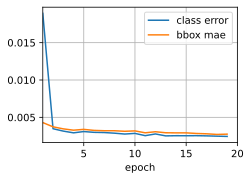

In [0]:
num_epochs, timer = 20, d2l.Timer()
animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                        legend=['class error', 'bbox mae'])
for epoch in range(num_epochs):
    # accuracy_sum, mae_sum, num_examples, num_labels
    metric = d2l.Accumulator(4)
    train_iter.reset()  # Read data from the start.
    for batch in train_iter:
        timer.start()
        X = batch.data[0].as_in_context(ctx)
        Y = batch.label[0].as_in_context(ctx)
        with autograd.record():
            # Generate multiscale anchor boxes and predict the category and
            # offset of each
            anchors, cls_preds, bbox_preds = net(X)
            # Label the category and offset of each anchor box
            bbox_labels, bbox_masks, cls_labels = npx.multibox_target(
                anchors, Y, cls_preds.transpose(0, 2, 1))
            # Calculate the loss function using the predicted and labeled
            # category and offset values
            l = calc_loss(cls_preds, cls_labels, bbox_preds, bbox_labels,
                          bbox_masks)
        l.backward()
        trainer.step(batch_size)
        metric.add(cls_eval(cls_preds, cls_labels), cls_labels.size,
                   bbox_eval(bbox_preds, bbox_labels, bbox_masks),
                   bbox_labels.size)
    cls_err, bbox_mae = 1-metric[0]/metric[1], metric[2]/metric[3]
    animator.add(epoch+1, (cls_err, bbox_mae))
print('class err %.2e, bbox mae %.2e' % (cls_err, bbox_mae))
print('%.1f examples/sec on %s' % (train_iter.num_image/timer.stop(), ctx))

## Prediction

In the prediction stage, we want to detect all objects of interest in the image. 

we read the test image and transform its size. Then, we convert it to the four-dimensional format required by the convolutional layer.

In [0]:
img = image.imread('img/pikachu.jpg')
feature = image.imresize(img, 256, 256).astype('float32')
X = np.expand_dims(feature.transpose(2, 0, 1), axis=0)

Using the MultiBoxDetection function, we predict the bounding boxes based on the anchor boxes and their predicted offsets. Then, we use non-maximum suppression to remove similar bounding boxes.

In [0]:
def predict(X):
    anchors, cls_preds, bbox_preds = net(X.as_in_context(ctx))
    cls_probs = npx.softmax(cls_preds).transpose(0, 2, 1)
    output = npx.multibox_detection(cls_probs, bbox_preds, anchors)
    idx = [i for i, row in enumerate(output[0]) if row[0] != -1]
    return output[0, idx]

In [0]:
output = predict(X)

we take all the bounding boxes with a confidence level of at least 0.3 and display them as the final output.

In [0]:
def display(img, output, threshold):
    d2l.set_figsize((5, 5))
    fig = d2l.plt.imshow(img.asnumpy())
    for row in output:
        score = float(row[1])
        if score < threshold:
          continue
        h, w = img.shape[0:2]
        bbox = [row[2:6] * np.array((w, h, w, h), ctx=row.context)]
        d2l.show_bboxes(fig.axes, bbox, '%.2f' % score, 'w')

In [0]:
display(img, output, threshold=0.3)

## Loss Function

For the predicted offsets, replace L1 norm loss with L1 regularization loss. This loss function uses a square function around zero for greater smoothness. This is the regularized area controlled by the hyperparameter σ. When σ is large, this loss is similar to the L1 norm loss. When the value is small, the loss function is smoother.

In [0]:
sigmas = [10, 1, 0.5]
lines = ['-', '--', '-.']
x = np.arange(-2, 2, 0.1)
d2l.set_figsize()

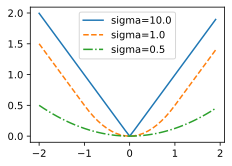

In [0]:
for l, s in zip(lines, sigmas):
    y = npx.smooth_l1(x, scalar=s)
    d2l.plt.plot(x.asnumpy(), y.asnumpy(), l, label='sigma=%.1f' % s)
d2l.plt.legend();

**Focal loss**

$−α(1 − p_j)^γlog p_j$

By increasing γ, we can effectively reduce the loss when the probability of predicting the correct category is high.

In [0]:
def focal_loss(gamma, x):
    return -(1 - x) ** gamma * np.log(x)

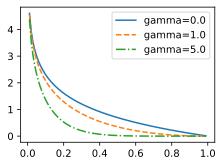

In [0]:
x = np.arange(0.01, 1, 0.01)
for l, gamma in zip(lines, [0, 1, 5]):
    y = d2l.plt.plot(x.asnumpy(), focal_loss(gamma, x).asnumpy(), l,
                     label='gamma=%.1f' % gamma)
d2l.plt.legend();

# Pascal VOC2012 Semantic Segmentation Dataset

The ImageSets/  (./data/VOCdevkit/VOC2012) Segmentation path contains text files that specify the training and testing examples. The JPEGIm- ages and SegmentationClass paths contain the example input images and labels, respectively. These labels are also in image format, with the same dimensions as the input images to which they correspond. In the labels, pixels with the same color belong to the same semantic category.

In [0]:
# Saved in the d2l package for later use
d2l.DATA_HUB['voc2012'] = (d2l.DATA_URL + 'VOCtrainval_11-May-2012.tar',
                           '4e443f8a2eca6b1dac8a6c57641b67dd40621a49')
voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')

These labels are also in image format, with the same dimensions as the input images to which they correspond. In the labels, pixels with the same color belong to the same semantic category.

In [0]:
# Saved in the d2l package for later use
def read_voc_images(voc_dir, is_train=True):
    """Read all VOC feature and label images to the memory."""
    txt_fname = '%s/ImageSets/Segmentation/%s' % (
        voc_dir, 'train.txt' if is_train else 'val.txt')
    with open(txt_fname, 'r') as f:
        images = f.read().split()
    features, labels = [None] * len(images), [None] * len(images)
    for i, fname in enumerate(images):
        features[i] = image.imread('%s/JPEGImages/%s.jpg' % (voc_dir, fname))
        labels[i] = image.imread(
            '%s/SegmentationClass/%s.png' % (voc_dir, fname))
    return features, labels

In [0]:
train_features, train_labels = read_voc_images(voc_dir, True)

We draw the first five input images and their labels. In the label images, white represents borders and black represents the background. Other colors correspond to different categories.

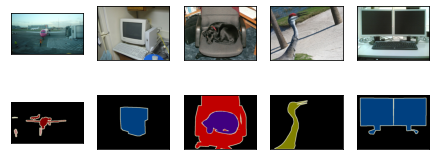

In [0]:
n=5
imgs = train_features[0:n] + train_labels[0:n] 
d2l.show_images(imgs, 2, n);

Next, we list each RGB color value in the labels and the categories they label.

In [0]:
# Saved in the d2l package for later use
VOC_COLORMAP = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                [0, 64, 128]]

In [0]:
# Saved in the d2l package for later use
VOC_CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
               'diningtable', 'dog', 'horse', 'motorbike', 'person',
               'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

After defining the two constants above, we can easily find the category index for each pixel in the labels.

In [0]:
# Saved in the d2l package for later use
def build_colormap2label():
    """Build an RGB color to label mapping for segmentation."""
    colormap2label = np.zeros(256 ** 3)
    for i, colormap in enumerate(VOC_COLORMAP):
        colormap2label[(colormap[0]*256 + colormap[1])*256 + colormap[2]] = i
    return colormap2label
    
# Saved in the d2l package for later use
def voc_label_indices(colormap, colormap2label):
    """Map an RGB color to a label."""
    colormap = colormap.astype(np.int32)
    idx = ((colormap[:, :, 0] * 256 + colormap[:, :, 1]) * 256
           + colormap[:, :, 2])
    return colormap2label[idx]

For example, in the first example image, the category index for the front part of the airplane is 1 and the index for the background is 0.

In [0]:
y = voc_label_indices(train_labels[0], build_colormap2label())
y[105:115, 130:140], VOC_CLASSES[1]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]]), 'aeroplane')

## Data Preprocessing

In semantic segmentation, this method would require us to re-map the predicted pixel categories back to the original-size input image. It would be very difficult to do this precisely, especially in segmented regions with different semantics. To avoid this problem, we crop the images to set dimensions and do not scale them. Specifically, we use the random cropping method used in image augmentation to crop the same region from input images and their labels.

In [0]:
# Saved in the d2l package for later use
def voc_rand_crop(feature, label, height, width):
    """Randomly crop for both feature and label images."""
    feature, rect = image.random_crop(feature, (width, height))
    label = image.fixed_crop(label, *rect)
    return feature, label

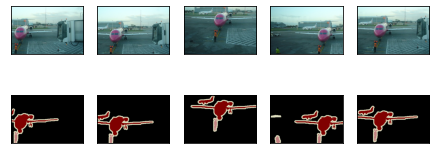

In [0]:
imgs = []
for _ in range(n):
    imgs += voc_rand_crop(train_features[0], train_labels[0], 200, 300)
d2l.show_images(imgs[::2] + imgs[1::2], 2, n);

# Dataset Classes for Custom Semantic Segmentation

We use the inherited Dataset class provided by Gluon to customize the semantic segmentation dataset class VOCSegDataset.

we can arbitrarily access the input image with the index idx and the category indexes for each of its pixels from the dataset. As some images in the dataset may be smaller than the output dimensions specified for random cropping, we must remove these example by using a custom filter function. In addition, we define the normalize_image function to normalize each of the three RGB channels of the input images.

In [0]:
# Saved in the d2l package for later use
class VOCSegDataset(gluon.data.Dataset):
    """A customized dataset to load VOC dataset."""
    def __init__(self, is_train, crop_size, voc_dir):
        self.rgb_mean = np.array([0.485, 0.456, 0.406])
        self.rgb_std = np.array([0.229, 0.224, 0.225])
        self.crop_size = crop_size
        features, labels = read_voc_images(voc_dir, is_train=is_train)
        self.features = [self.normalize_image(feature)
                         for feature in self.filter(features)]
        self.labels = self.filter(labels)
        self.colormap2label = build_colormap2label()
        print('read ' + str(len(self.features)) + ' examples')
    def normalize_image(self, img):
        return (img.astype('float32') / 255 - self.rgb_mean) / self.rgb_std
    def filter(self, imgs):
        return [img for img in imgs if (
            img.shape[0] >= self.crop_size[0] and
            img.shape[1] >= self.crop_size[1])]
    def __getitem__(self, idx):
        feature, label = voc_rand_crop(self.features[idx], self.labels[idx],
                                       *self.crop_size)
        return (feature.transpose(2, 0, 1),
                voc_label_indices(label, self.colormap2label))
    def __len__(self):
        return len(self.features)

**Reading the Dataset**

Using the custom VOCSegDataset class, we create the training set and testing set instances. We assume the random cropping operation output images in the shape 320 × 480. Below, we can see the number of examples retained in the training and testing sets.

In [0]:
crop_size = (320, 480)
voc_train = VOCSegDataset(True, crop_size, voc_dir)
voc_test = VOCSegDataset(False, crop_size, voc_dir)

read 1114 examples
read 1078 examples


We set the batch size to 64 and define the iterators for the training and testing sets. Print the shape of the first minibatch. In contrast to image classification and object recognition, labels here are three-dimensional arrays.

In [0]:
batch_size = 64
train_iter = gluon.data.DataLoader(voc_train, 
                                   batch_size,
                                   shuffle=True, 
                                   last_batch='discard',
                                   num_workers=d2l.get_dataloader_workers())

In [0]:
for X, Y in train_iter:
    print(X.shape)
    print(Y.shape)
    break

(64, 3, 320, 480)
(64, 320, 480)


**Putting All Things Together**

Finally, we define a function load_data_voc that downloads and loads this dataset, and then re- turns the data loaders.

In [0]:
# Saved in the d2l package for later use
def load_data_voc(batch_size, crop_size):
    """Download and load the VOC2012 semantic dataset."""
    voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')
    num_workers = d2l.get_dataloader_workers()
    train_iter = gluon.data.DataLoader(
        VOCSegDataset(True, crop_size, voc_dir), batch_size,
        shuffle=True, last_batch='discard', num_workers=num_workers)
    test_iter = gluon.data.DataLoader(
        VOCSegDataset(False, crop_size, voc_dir), batch_size,
        last_batch='discard', num_workers=num_workers)
    return train_iter, test_iter

# Transposed Convolution

Applications such as **semantic segmentation** and **generative adversarial networks** require to predict values for each pixel and therefore needs to increase input width and height. **Transposed convolution**, also named *fractionally-strided convolution* or *deconvolution* serves this purpose.

In [0]:
# Transposed convolution, operation by giving matrix kernel K and matrix input X.
def trans_conv(X, K):
    h, w = K.shape
    Y = np.zeros((X.shape[0] + h - 1, X.shape[1] + w - 1))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
          Y[i: i + h, j: j + w] += X[i, j] * K
    return Y

Convolution summarizes input values through the kernel. While the transposed convolution broadcasts input values through the kernel, which results in a larger output shape.

In [0]:
X = np.array([[0, 1], [2, 3]])
K = np.array([[0, 1], [2, 3]])
trans_conv(X, K)

array([[ 0.,  0.,  1.],
       [ 0.,  4.,  6.],
       [ 4., 12.,  9.]])

We can use nn.Conv2DTranspose to obtain the same results. As nn.Conv2D, both input and kernel should be 4-D tensors.

In [0]:
X, K = X.reshape(1, 1, 2, 2), K.reshape(1, 1, 2, 2)
tconv = nn.Conv2DTranspose(1, kernel_size=2)
tconv.initialize(init.Constant(K))
tconv(X)

array([[[[ 0.,  0.,  1.],
         [ 0.,  4.,  6.],
         [ 4., 12.,  9.]]]])

## Padding, Strides, and Channels

We apply padding elements to the input in convolution, while they are applied to the output in transposed convolution. A 1 × 1 padding means we first compute the output as normal, then remove the first/last rows and columns.

In [0]:
tconv = nn.Conv2DTranspose(1, kernel_size=2, padding=1)
tconv.initialize(init.Constant(K))
tconv(X)

array([[[[4.]]]])

Similarly, strides are applied to outputs as well.

In [0]:
tconv = nn.Conv2DTranspose(1, kernel_size=2, strides=2)
tconv.initialize(init.Constant(K))
tconv(X)

array([[[[0., 0., 0., 1.],
         [0., 0., 2., 3.],
         [0., 2., 0., 3.],
         [4., 6., 6., 9.]]]])

The multi-channel extension of the transposed convolution is the same as the convolution. When the input has multiple channels, denoted by $c_i$ , the transposed convolution assigns a $k_h × k_w$ kernel matrix to each input channel. If the output has a channel size co, then we have a $c_i ×k_h ×k_w$ kernel for each output channel.

In [0]:
# Input X
X = np.random.uniform(size=(1, 10, 16, 16))

In [0]:
# Instantiate a convolution and transpose convolution
conv = nn.Conv2D(20, kernel_size=5, padding=2, strides=3)
tconv = nn.Conv2DTranspose(10, kernel_size=5, padding=2, strides=3)

# Initialize convolution and transpose convolution
conv.initialize()
tconv.initialize()

In [0]:
# check by comparing dimensions
tconv(conv(X)).shape == X.shape

True

## Analogy to Matrix Transposition

The transposed convolution takes its name from the matrix transposition. In fact, convolution operations can also be achieved by matrix multiplication. For example, we define a 3×3 input X with a 2 × 2 kernel K, and then use corr2d to compute the convolution output.

In [0]:
X = np.arange(9).reshape(3, 3)
K = np.array([[0, 1], [2, 3]])
Y = d2l.corr2d(X, K)
Y

array([[19., 25.],
       [37., 43.]])

Next, we rewrite convolution kernel K as a matrix W . Its shape will be (4, 9), where the ith row present applying the kernel to the input to generate the ith output element.

In [0]:
def kernel2matrix(K):
    k, W = np.zeros(5), np.zeros((4, 9))
    k[:2], k[3:5] = K[0, :], K[1, :]
    W[0, :5], W[1, 1:6], W[2, 3:8], W[3, 4:] = k, k, k, k
    return W
W = kernel2matrix(K)
W

array([[0., 1., 0., 2., 3., 0., 0., 0., 0.],
       [0., 0., 1., 0., 2., 3., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 2., 3., 0.],
       [0., 0., 0., 0., 0., 1., 0., 2., 3.]])

Then the convolution operator can be implemented by matrix multiplication with proper reshaping.

In [0]:
Y == np.dot(W, X.reshape(-1)).reshape(2, 2)

array([[ True,  True],
       [ True,  True]])

We can implement transposed convolution as a matrix multiplication as well by reusing `kernel2matrix`. To reuse the generated W , we construct a 2 × 2 input, so the corresponding weight matrix will have a shape(9,4), which 
is $W^⊤$.

In [0]:
X = np.array([[0, 1], [2, 3]])
Y = trans_conv(X, K)
Y == np.dot(W.T, X.reshape(-1)).reshape(3, 3)

## Summary

* Compared to convolutions that reduce inputs through kernels, transposed convolutions broadcast inputs.
* If a convolution layer reduces the input width and height by nw and hh time, respectively. Then a transposed convolution layer with the same kernel sizes, padding and strides will increase the input width and height by nw and nh, respectively.
* We can implement convolution operations by the matrix multiplication, the corresponding transposed convolutions can be done by transposed matrix multiplication.

# Fully Convolutional Networks(FCN)

A **fully convolutional network (FCN)** uses a convolutional neural network to transform image pixels to pixel categories. 

Unlike a normal convolutional neural networks, an FCN transforms the height and width of the intermediate layer *feature map back to the size of input image through the transposed convolution layer*, so that the predictions have a one-to-one correspondence with input *image in spatial dimension* (height and width). Given a position on the spatial dimension, the output of the channel dimension will be a category prediction of the pixel corresponding to the location.


## Constructing a Model

The fully convolutional network first uses the convolutional neural network to extract image features, then transforms the number of channels into the number of categories through the 1 × 1 convolution layer, and finally transforms the height and width of the feature map to the size of the input image by using the transposed convolution layer.

We use a ResNet-18 model pre-trained on the ImageNet dataset to extract image features and record the network instance as pretrained_net. As we can see, the last two layers of the model member variable features are the global maximum pooling layer GlobalAvgPool2D and example flattening layer Flatten. The output module contains the fully connected layer used for output. These layers are not required for a fully convolutional network.

In [0]:
pretrained_net = gluon.model_zoo.vision.resnet18_v2(pretrained=True)

In [0]:
pretrained_net.features[-4:]

In [0]:

pretrained_net.output

Next, we create the fully convolutional network instance net. It duplicates all the neural layers except the last two layers of the instance member variable features of pretrained_net and the model parameters obtained after pre-training.


In [0]:
net = nn.HybridSequential()
for layer in pretrained_net.features[:-2]:
    net.add(layer)

Given an input of a height and width of 320 and 480 respectively, the forward computation of net will reduce the height and width of the input to 1/32 of the original, i.e., 10 and 15.

In [0]:
X = np.random.uniform(size=(1, 3, 320, 480))
net(X).shape

Next, we transform the number of output channels to the number of categories of Pascal VOC2012 (21) through the 1 × 1 convolution layer. Finally, we need to magnify the height and width of the feature map by a factor of 32 to change them back to the height and width of the input image.

## Initializing the Transposed Convolution Layer

The transposed convolution layer can magnify a feature map. 

There are many methods for upsampling, and one common method is bilinear interpolation. Simply speaking, in order to get the pixel of the output image at the coordinates (x, y), the coordinates are first mapped to the coordinates of the input image (x′, y′). This can be done based on the ratio of the size of three input to the size of the output. The mapped values x′ and y′ are usually real numbers. Then, we find the four pixels closest to the coordinate (x′,y′) on the input image. Finally, the pixels of the output image at coordinates (x, y) are calculated based on these four pixels on the input image and their relative distances to (x′, y′).

Upsampling by bilinear interpolation can be implemented by transposed convolution layer of the convolution kernel constructed using the following `bilinear_kernel` function.

In [0]:
def bilinear_kernel(in_channels, out_channels, kernel_size):
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = (np.arange(kernel_size).reshape(-1, 1),
          np.arange(kernel_size).reshape(1, -1))
    filt = (1 - np.abs(og[0] - center) / factor) * \
           (1 - np.abs(og[1] - center) / factor)
    weight = np.zeros((in_channels, out_channels, kernel_size, kernel_size))
    weight[range(in_channels), range(out_channels), :, :] = filt
    return np.array(weight)

we will experiment with bilinear interpolation upsampling implemented by transposed con- volution layers. Construct a transposed convolution layer that magnifies height and width of input by a factor of 2 and initialize its convolution kernel with the `bilinear_kernel` function.


In [0]:
conv_trans = nn.Conv2DTranspose(3, kernel_size=4, padding=1, strides=2)
conv_trans.initialize(init.Constant(bilinear_kernel(3, 3, 4)))

Read the image X and record the result of upsampling as Y. In order to print the image, we need to adjust the position of the channel dimension.

In [0]:
img = image.imread('img/catdog.jpg')
X = np.expand_dims(img.astype('float32').transpose(2, 0, 1), axis=0) / 255
Y = conv_trans(X)
out_img = Y[0].transpose(1, 2, 0)

As you can see, the transposed convolution layer magnifies both the height and width of the image by a factor of 2. It is worth mentioning that, besides to the difference in coordinate scale, the image magnified by bilinear interpolation and original image printed look the same.

In [0]:
d2l.set_figsize((3.5, 2.5))
print('input image shape:', img.shape)
d2l.plt.imshow(img.asnumpy());
print('output image shape:', out_img.shape)
d2l.plt.imshow(out_img.asnumpy());

In a fully convolutional network, we initialize the transposed convolution layer for upsampled bilinear interpolation. For a 1 × 1 convolution layer, we use Xavier for randomly initialization.

In [0]:
W = bilinear_kernel(num_classes, num_classes, 64)
net[-1].initialize(init.Constant(W))
net[-2].initialize(init=init.Xavier())

## Training FCN

**Reading the Dataset**

We read the dataset using the method described in the previous section. Here, we specify shape of the randomly cropped output image as 320 × 480, so both the height and width are divisible by 32.

In [0]:
batch_size, crop_size = 32, (320, 480)
train_iter, test_iter = d2l.load_data_voc(batch_size, crop_size)

**Training**

The loss function and accuracy calculation here are not substantially different from those used in image classification. Because we use the channel of the transposed convolution layer to predict pixel categories, the axis=1 (channel dimension) option is specified in SoftmaxCrossEntropyLoss. In addition, the model calculates the accuracy based on whether the prediction category of each pixel is correct.

In [0]:
num_epochs, lr, wd, ctx = 5, 0.1, 1e-3, d2l.try_all_gpus()
loss = gluon.loss.SoftmaxCrossEntropyLoss(axis=1)
net.collect_params().reset_ctx(ctx)

In [0]:
trainer = gluon.Trainer(net.collect_params(), 'sgd',
                        {'learning_rate': lr, 'wd': wd})
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, ctx)

## Prediction

During predicting, we need to standardize the input image in each channel and transform them into the four-dimensional input format required by the convolutional neural network.

In [0]:
def predict(img):
    X = test_iter._dataset.normalize_image(img)
    X = np.expand_dims(X.transpose(2, 0, 1), axis=0)
    pred = net(X.as_in_context(ctx[0])).argmax(axis=1)
    return pred.reshape(pred.shape[1], pred.shape[2])

To visualize the predicted categories for each pixel, we map the predicted categories back to their labeled colors in the dataset.

In [0]:
def label2image(pred):
    colormap = np.array(d2l.VOC_COLORMAP, ctx=ctx[0], dtype='uint8')
    X = pred.astype('int32')
    return colormap[X, :]

The size and shape of the images in the test dataset vary. Because the model uses a transposed convolution layer with a stride of 32, when the height or width of the input image is not divisible by 32, the height or width of the transposed convolution layer output deviates from the size of the input image. In order to solve this problem, we can crop multiple rectangular areas in the image with heights and widths as integer multiples of 32, and then perform forward computation on the pixels in these areas. When combined, these areas must completely cover the input image. When a pixel is covered by multiple areas, the average of the transposed convolution layer output in the forward computation of the different areas can be used as an input for the softmax operation to predict the category.

For the sake of simplicity, we only read a few large test images and crop an area with a shape of 320 × 480 from the top-left corner of the image. Only this area is used for prediction. For the input image, we print the cropped area first, then print the predicted result, and finally print the labeled category.

In [0]:
voc_dir = d2l.download_extract('voc2012', 'VOCdevkit/VOC2012')
test_images, test_labels = d2l.read_voc_images(voc_dir, False)
n, imgs = 4, []
for i in range(n):
    crop_rect = (0, 0, 480, 320)
    X = image.fixed_crop(test_images[i], *crop_rect)
    pred = label2image(predict(X))
    imgs += [X, pred, image.fixed_crop(test_labels[i], *crop_rect)]
d2l.show_images(imgs[::3] + imgs[1::3] + imgs[2::3], 3, n, scale=2);

## Summary

* The **fully convolutional network** first uses the **convolutional neural network to extract image features**, then *transforms the number of channels* into the number of categories through the **1 × 1 convolution layer**, and finally *transforms* the height and width of the *feature map to the size of the input image* by using the **transposed convolution** layer to *output the category of each pixel*.
* In a fully convolutional network, we initialize the transposed convolution layer for **upsampled bilinear interpolation**.

In [0]:
num_classes = 21
net.add(nn.Conv2D(num_classes, kernel_size=1),
        nn.Conv2DTranspose(num_classes,
                           kernel_size=64, 
                           padding=16, 
                           strides=32))

In [0]:
def bilinear_kernel(in_channels, out_channels, kernel_size):
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = (np.arange(kernel_size).reshape(-1, 1),
          np.arange(kernel_size).reshape(1, -1))
    filt = (1 - np.abs(og[0] - center) / factor) * \
           (1 - np.abs(og[1] - center) / factor)
    weight = np.zeros((in_channels, out_channels, kernel_size, kernel_size))
    weight[range(in_channels), range(out_channels), :, :] = filt
    return np.array(weight)

In [0]:
conv_trans = nn.Conv2DTranspose(3, kernel_size=4, padding=1, strides=2)
conv_trans.initialize(init.Constant(bilinear_kernel(3, 3, 4)))

In [0]:
img = image.imread('../img/catdog.jpg')
X = np.expand_dims(img.astype('float32').transpose(2, 0, 1), axis=0) / 255
Y = conv_trans(X)
out_img = Y[0].transpose(1, 2, 0)

In [0]:
d2l.set_figsize((3.5, 2.5))
print('input image shape:', img.shape)
d2l.plt.imshow(img.asnumpy());
print('output image shape:', out_img.shape)
d2l.plt.imshow(out_img.asnumpy());

In [0]:
W = bilinear_kernel(num_classes, num_classes, 64)
net[-1].initialize(init.Constant(W))
net[-2].initialize(init=init.Xavier())